
# Process the global variogram

In [1]:
# Load Biospytial modules and etc.
%matplotlib inline
import sys
sys.path.append('/apps')
import django
django.setup()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
## Use the ggplot style
plt.style.use('ggplot')

In [2]:
from external_plugins.spystats import tools
%run ../testvariogram.py

/opt/conda/envs/biospytial/lib/python2.7/site-packages/IPython/core/pylabtools.py:168: DtypeWarning: Columns (24) have mixed types. Specify dtype option on import or set low_memory=False.
  safe_execfile(fname,*where,**kw)


In [3]:
%time vg = tools.Variogram(new_data,'residuals1',using_distance_threshold=500000)

CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 498 µs


In [5]:
### Test creation of chunks
chunks = tools.PartitionDataSet(new_data,namecolumnx='newLon',namecolumny='newLat',n_chunks=3)

In [52]:
sizes = map(lambda c : c.shape[0],chunks)

In [7]:
vg0 = tools.Variogram(chunks[0],response_variable_name='residuals1',using_distance_threshold=500000)
vg1 = tools.Variogram(chunks[1],response_variable_name='residuals1',using_distance_threshold=500000)
vg2 = tools.Variogram(chunks[2],response_variable_name='residuals1',using_distance_threshold=500000)
vg3 = tools.Variogram(chunks[3],response_variable_name='residuals1',using_distance_threshold=500000)

CPU times: user 26.8 s, sys: 1.34 s, total: 28.2 s
Wall time: 28.2 s


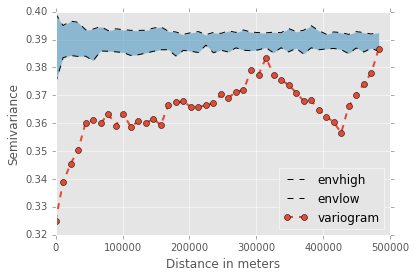

In [8]:
%time vg0.plot(num_iterations=50,with_envelope=True)

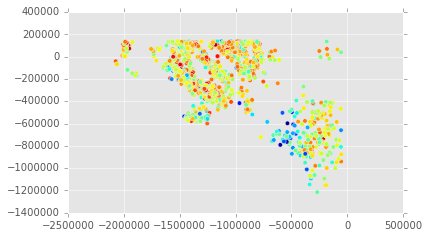

In [9]:
chunks[0].plot(column='residuals1')

CPU times: user 35min 20s, sys: 7min 8s, total: 42min 29s
Wall time: 42min 28s


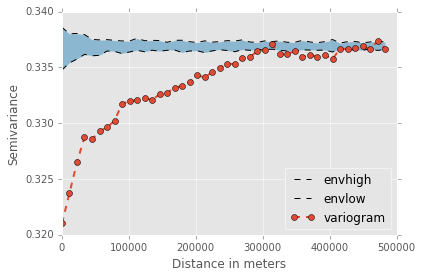

In [10]:
%time vg1.plot(num_iterations=50,with_envelope=True)

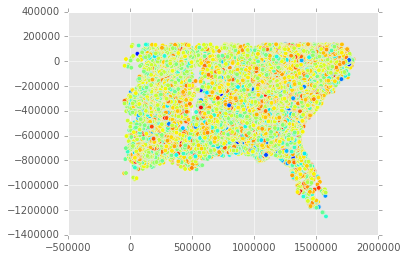

In [11]:
chunks[1].plot(column='residuals1')

CPU times: user 10min 19s, sys: 1min 53s, total: 12min 12s
Wall time: 12min 12s


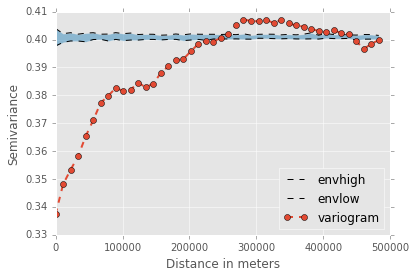

In [12]:
%time vg2.plot(num_iterations=50,with_envelope=True)

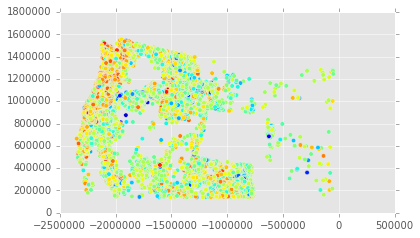

In [13]:
chunks[2].plot(column='residuals1')

CPU times: user 35min 43s, sys: 6min 32s, total: 42min 16s
Wall time: 42min 15s


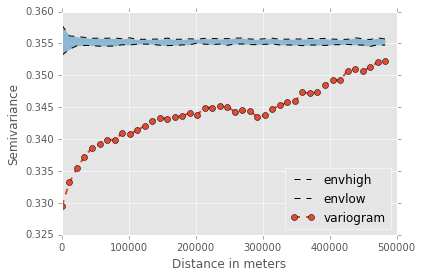

In [14]:
%time vg3.plot(num_iterations=50,with_envelope=True)

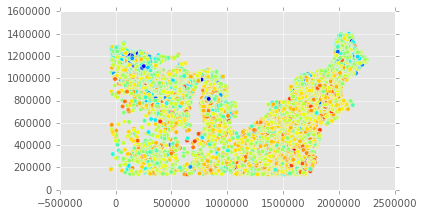

In [15]:
chunks[3].plot(column='residuals1')

In [16]:
envelopes = map(lambda c : c.envelope,chunks)

In [23]:
c = chunks[0]

In [24]:
variograms = [vg0,vg1,vg2,vg3]

In [25]:
envelopes = map(lambda v : v.envelope,variograms)

In [44]:
colors = plt.rcParams['axes.prop_cycle']
colors = ['red','green','grey','orange']

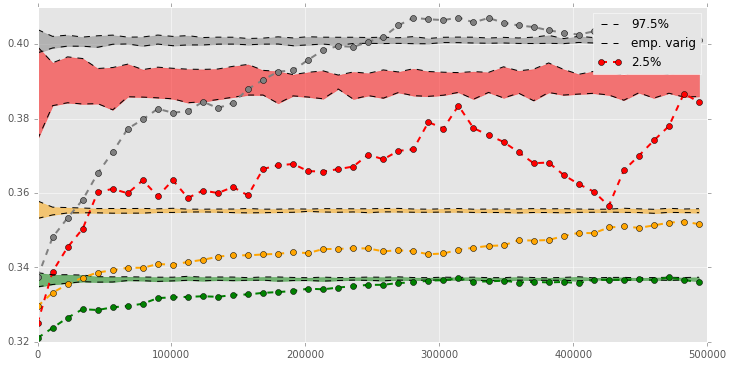

In [60]:

plt.figure(figsize=(12, 6))
for i,envelope in enumerate(envelopes):
    plt.plot(envelope.lags,envelope.envhigh,'k--')
    plt.plot(envelope.lags,envelope.envlow,'k--')
    plt.fill_between(envelope.lags,envelope.envlow,envelope.envhigh,alpha=0.5,color=colors[i])
    plt.plot(envelope.lags,envelope.variogram,'o--',lw=2.0,color=colors[i])
    
plt.legend(labels=['97.5%','emp. varig','2.5%'])


## Now the global variogram
For doing this I need to take a weighted average.


In [61]:
nv0 = vg0.envelope

In [62]:
nv0

,envhigh,envlow,lags,variogram
0,0.399299,0.374408,0.000000,0.324999
1,0.394994,0.383485,11224.489796,0.338889
2,0.396599,0.384269,22448.979592,0.345425
3,0.396147,0.383926,33673.469388,0.350371
4,0.393466,0.384021,44897.959184,0.360229
5,0.393732,0.382356,56122.448980,0.361112
6,0.394642,0.385876,67346.938776,0.359922
7,0.393172,0.385782,78571.428571,0.363416
8,0.393827,0.385583,89795.918367,0.359132
9,0.393525,0.385317,101020.408163,0.363458
